In [1]:

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import Model, Sequential, layers

import numpy as np

C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
model = Sequential([
    
    layers.InputLayer(input_shape=(50,)),
    
    layers.Dense(100, 'relu'),
    
    layers.Dense(100, 'relu'),
    
    layers.Dense(10, 'softmax')

])

In [3]:
model = Sequential([

    layers.Dense(100, 'relu', input_shape=(50,)),

    layers.Dense(100, 'relu'),

    layers.Dense(10, 'softmax')

])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 16,210
Trainable params: 16,210
Non-trainable params: 0
_________________________________________________________________


In [5]:
batch_size = 64

input_batch = np.zeros((batch_size, 50))

output = model(input_batch).numpy() #получаем массив размером (64, 10)

In [6]:

model = Sequential([

    layers.Dropout(0.999)

])

 

print(model(np.ones((1, 5))).numpy())

print(model(np.ones((1, 5)), training=True).numpy())

[[1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]]


In [7]:
model = Sequential([

    layers.Dense(300, 'relu', input_shape=(400,)),

    layers.Dense(200, 'relu'),

    layers.Dense(100, 'softmax')

])

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               120300    
                                                                 
 dense_7 (Dense)             (None, 200)               60200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
Total params: 200,600
Trainable params: 200,600
Non-trainable params: 0
_________________________________________________________________


In [9]:
input = keras.Input(shape=(50,))

output1 = layers.Dense(100, 'relu')(input)

output2 = layers.Dense(100, 'relu')(output1)

output3 = layers.Dense(10, 'softmax')(output2)

model = Model(inputs=input, outputs=output3)

In [10]:
input = keras.Input(shape=(50,))

out1 = layers.Dense(1000, 'relu')(input)

out2 = layers.Dense(1000, 'relu')(out1)

out3 = layers.Dense(1)(out2)

out4 = layers.Dense(1)(input)

output = out3 + out4

model = Model(inputs=input, outputs=output)

In [11]:
model = Model(inputs=input, outputs=[output, out3])

In [12]:
input = keras.Input(shape=(1000,))

out1 = layers.Dense(1000, 'relu')(input)

out2 = layers.Concatenate(axis=1)([input, out1])

out3 = layers.Dense(1000, 'relu')(out2)

out4 = layers.Concatenate(axis=1)([out2, out3])

out5 = layers.Dense(1000, 'relu')(out4)

out6 = layers.Concatenate(axis=1)([out4, out5])

out7 = layers.Dense(1000, 'relu')(out6)

out8 = layers.Concatenate(axis=1)([out6, out7])

model = Model(inputs=input, outputs=out8)

In [13]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 1000)         1001000     ['input_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 2000)         0           ['input_4[0][0]',                
                                                                  'dense_16[0][0]']               
                                                                                                  
 dense_17 (Dense)               (None, 1000)         2001000     ['concatenate[0][0]']      

In [14]:
input = keras.Input(shape=(50,))

branch1 = Sequential([

    layers.Dense(1000, 'relu'),

    layers.Dense(1000, 'relu'),

    layers.Dense(1)

])

branch2 = layers.Dense(1)

output = branch1(input) + branch2(input)

model = Model(inputs=input, outputs=output)

In [15]:

from tensorflow.keras.applications import Xception

model = Sequential([

    Xception(include_top=False, input_shape=(150, 150, 3)),

    layers.GlobalMaxPool2D(),

    layers.Dropout(0.5),

    layers.Dense(10)

])

83683744/83683744 [==============================] - 3s 0us/step


In [16]:
print(len(model.layers)) #4

print(len(model.layers[0].layers)) #132

4
132


In [17]:
base_model = Xception(include_top=False, input_shape=(150, 150, 3))

output = layers.GlobalMaxPool2D()(base_model.output)

output = layers.Dropout(0.5)(output)

output = layers.Dense(10)(output)

model = Model(inputs=base_model.input, outputs=output)

In [18]:
model = Sequential([

    layers.InputLayer(400),

    layers.Dense(300),

    layers.Dense(200),

    layers.Dense(100),

])

In [19]:
input_data = np.zeros((64, 400))

l1, l2, l3 = model.layers

layer2_output = l2(l1(input_data)).numpy()

In [20]:
submodel = Model(inputs=model.input, outputs=model.layers[1].output)

layer2_output = submodel(input_data).numpy()

In [21]:
model.save('model.h5') #сохранение

model = keras.models.load_model('model.h5') #загрузка

In [22]:
layer = model.layers[0]

W, b = layer.get_weights()

layer.set_weights((W, np.zeros_like(b)))

In [23]:
layer = layers.Dense(100)

print([x.shape for x in layer.get_weights()])

layer.build((20,)) #или так: layer(np.zeros((1, 20)))

print([x.shape for x in layer.get_weights()])


[]
[(20, 100), (100,)]


In [24]:
base_model_1 = Xception(include_top=False, input_shape=(150, 150, 3))

In [41]:
np.array([]).size

0

In [ ]:
layer_number = -1

layer_numbers = []

layer_count = []

for layer in base_model_1.layers:
    
    layer_number += 1
    
    layer_numbers.append(layer_number)
    
    if layer.get_weights():
    
        print(layer.get_weights()[0].size)
        
        layer_count.append(layer.get_weights()[0].size)
        
    else:
        
        layer_count.append(0)



In [43]:
import seaborn as sns

<AxesSubplot:>

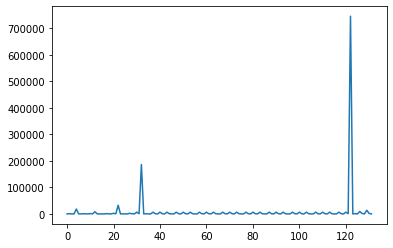

In [44]:
sns.lineplot(x=layer_numbers, y=layer_count)

In [45]:
from tensorflow.keras import layers

layers.Dense(1000, activation='relu')

In [46]:
layers.Dense(1000),
layers.Activation('relu')

In [47]:
model = Sequential([
    
    layers.Dense(100),
    
    layers.ReLU(),
    
    layers.Dense(10),
    
    layers.Softmax()
    
])


In [48]:
keras.activations.get('relu')

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [49]:
layers.Dense(1000, activation=keras.activations.relu)

In [50]:
layers.Dense(1000, activation=tf.nn.relu)

In [51]:
my_activation = lambda x: tf.math.sin(x) + x

l = layers.Dense(1000, activation=my_activation)

In [ ]:
input = np.zeros((64, 256, 256, 3))

output = input.reshape(len(input), -1)

output.shape #(64, 196608)


In [52]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    
    layers.Flatten(),
    
    layers.Dense(100, 'relu'),
    
    layers.Dense(10, 'softmax')
    
])

 
 
input = np.zeros((64, 256, 256, 3))

model(input).numpy().shape #(64, 10)


(64, 10)

In [53]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (64, 196608)              0         
                                                                 
 dense_37 (Dense)            (64, 100)                 19660900  
                                                                 
 dense_38 (Dense)            (64, 10)                  1010      
                                                                 
Total params: 19,661,910
Trainable params: 19,661,910
Non-trainable params: 0
_________________________________________________________________


In [54]:
model = Sequential([
    
    layers.Dense(100, 'relu'),
    
    layers.Dense(10),
    
])

 
 
assert model.layers[0].trainable == True

model.trainable = False

assert model.layers[0].trainable == False


In [ ]:
model = Sequential([
    
    layers.InputLayer((100,)),
    
    layers.Dense(500, 'relu'),
    
    layers.Dense(10, 'softmax')
    
])

model.compile(
    
    loss='sparse_categorical_crossentropy',
    
    optimizer='adam',
    
    metrics='accuracy'
    
)

In [56]:
from keras.metrics import Accuracy

acc = Accuracy()

print(acc([0], [1]).numpy()) #0.0

print(acc([1], [1]).numpy()) #0.5

print(acc([1], [1]).numpy()) #0.6666667


0.0
0.5
0.6666667


11490434/11490434 [==============================] - 1s 0us/step
(60000, 784) float64
(10000, 784) float64
(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


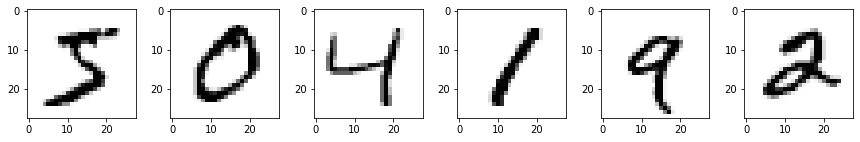

In [57]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import Model, Sequential, layers, losses, optimizers

 
 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28) / 255

X_test = X_test.reshape(-1, 28*28) / 255

 
 
print(X_train.shape, X_train.dtype) #(60000, 784) float64

print(X_test.shape, X_test.dtype) #(10000, 784) float64

 
 
print(y_train.shape, y_train[:10]) #(60000,) [5 0 4 1 9 2 1 3 1 4]

print(y_test.shape, y_test[:10]) #(10000,) [7 2 1 0 4 1 4 9 5 9]

 
 
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(15, 2))

for img, ax in zip(X_train, axes.flat):
    
    ax.imshow(img.reshape(28, 28), cmap='Greys')
    
plt.show()


In [64]:
tf.config.list_physical_devices('GPU')

[]

In [62]:
tf.test.gpu_device_name()

''

In [ ]:
model = Sequential([
    layers.InputLayer(28*28),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
])